In [127]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings

In [2]:
df=pd.read_csv('s_diabetes.csv')

In [40]:
df.shape

(768, 9)

In [4]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
cdf=df.copy()

In [7]:
cdf.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
cdf.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
cdf.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
cdf.duplicated().sum()

0

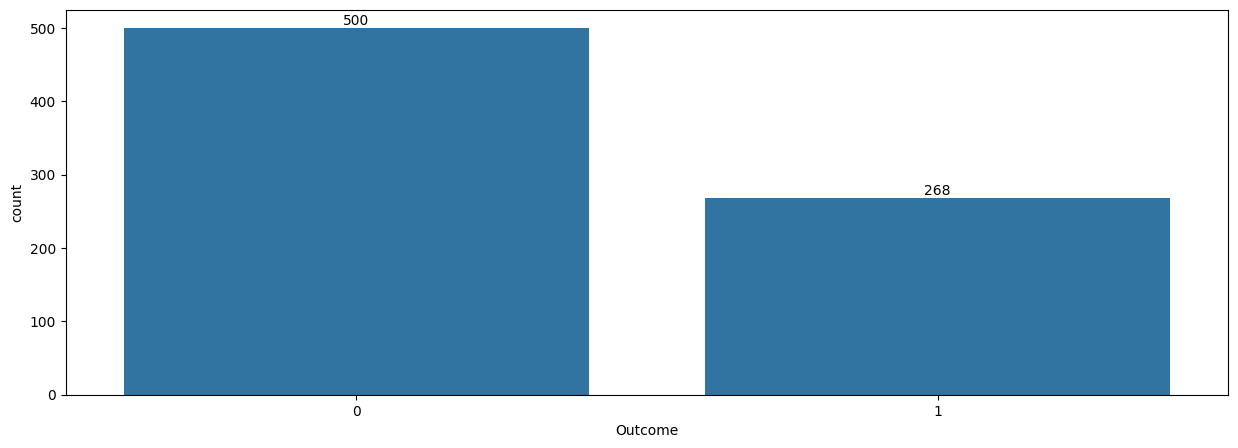

In [11]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Outcome',data=cdf)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

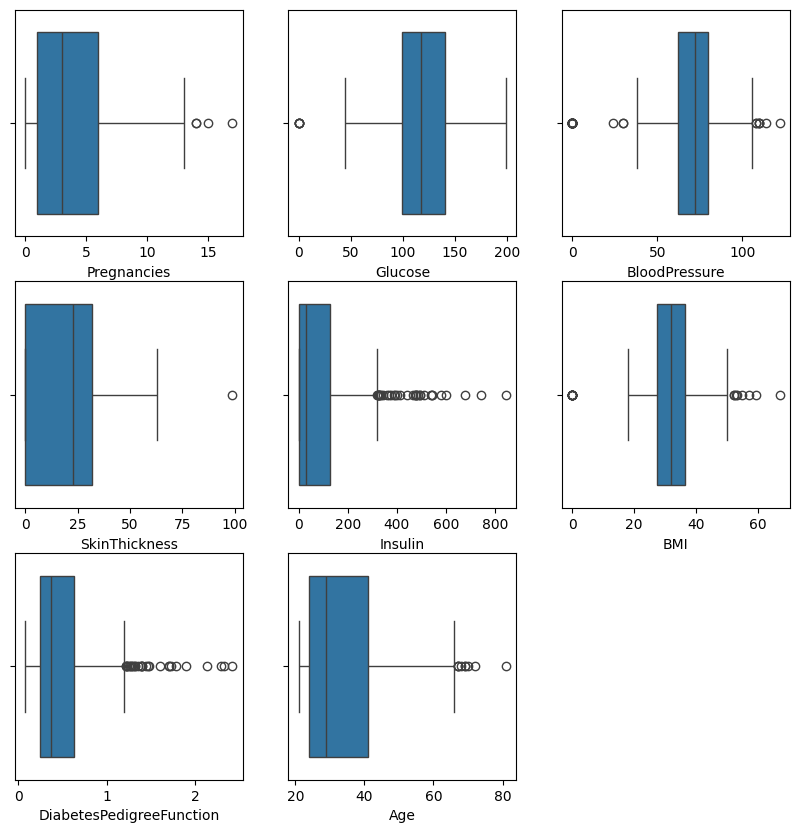

In [41]:
#observing outliers
plt.figure(figsize=(10,10))
for i,col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=col,data=cdf)

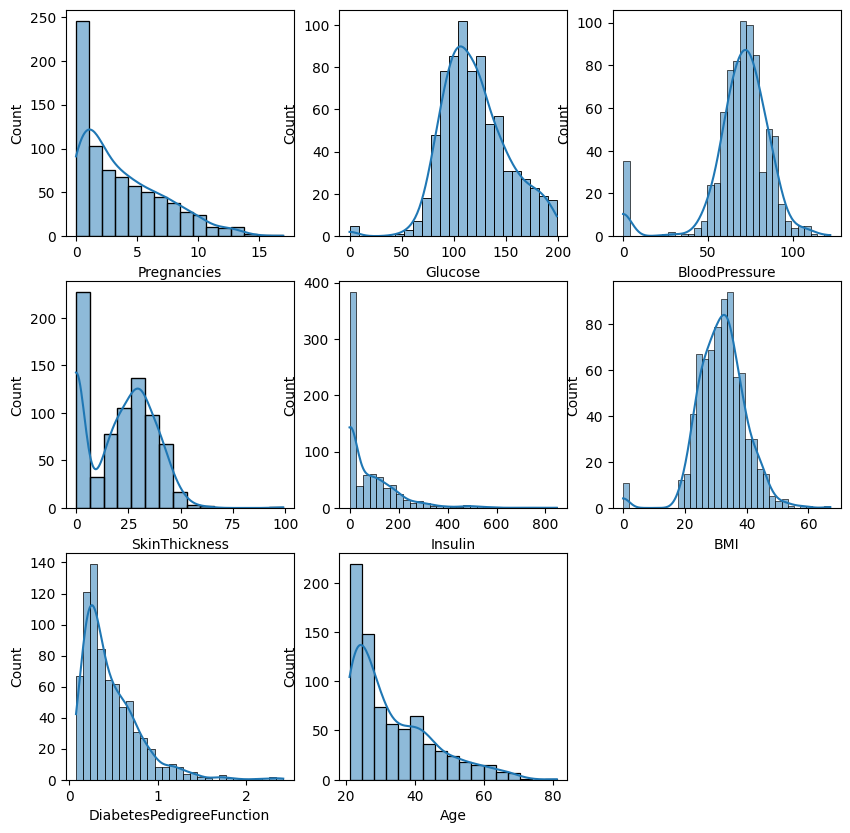

In [42]:
plt.figure(figsize=(10,10))
for i,col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']):
    plt.subplot(3,3,i+1)
    sns.histplot(x=col,data=cdf,kde=True)

<Axes: >

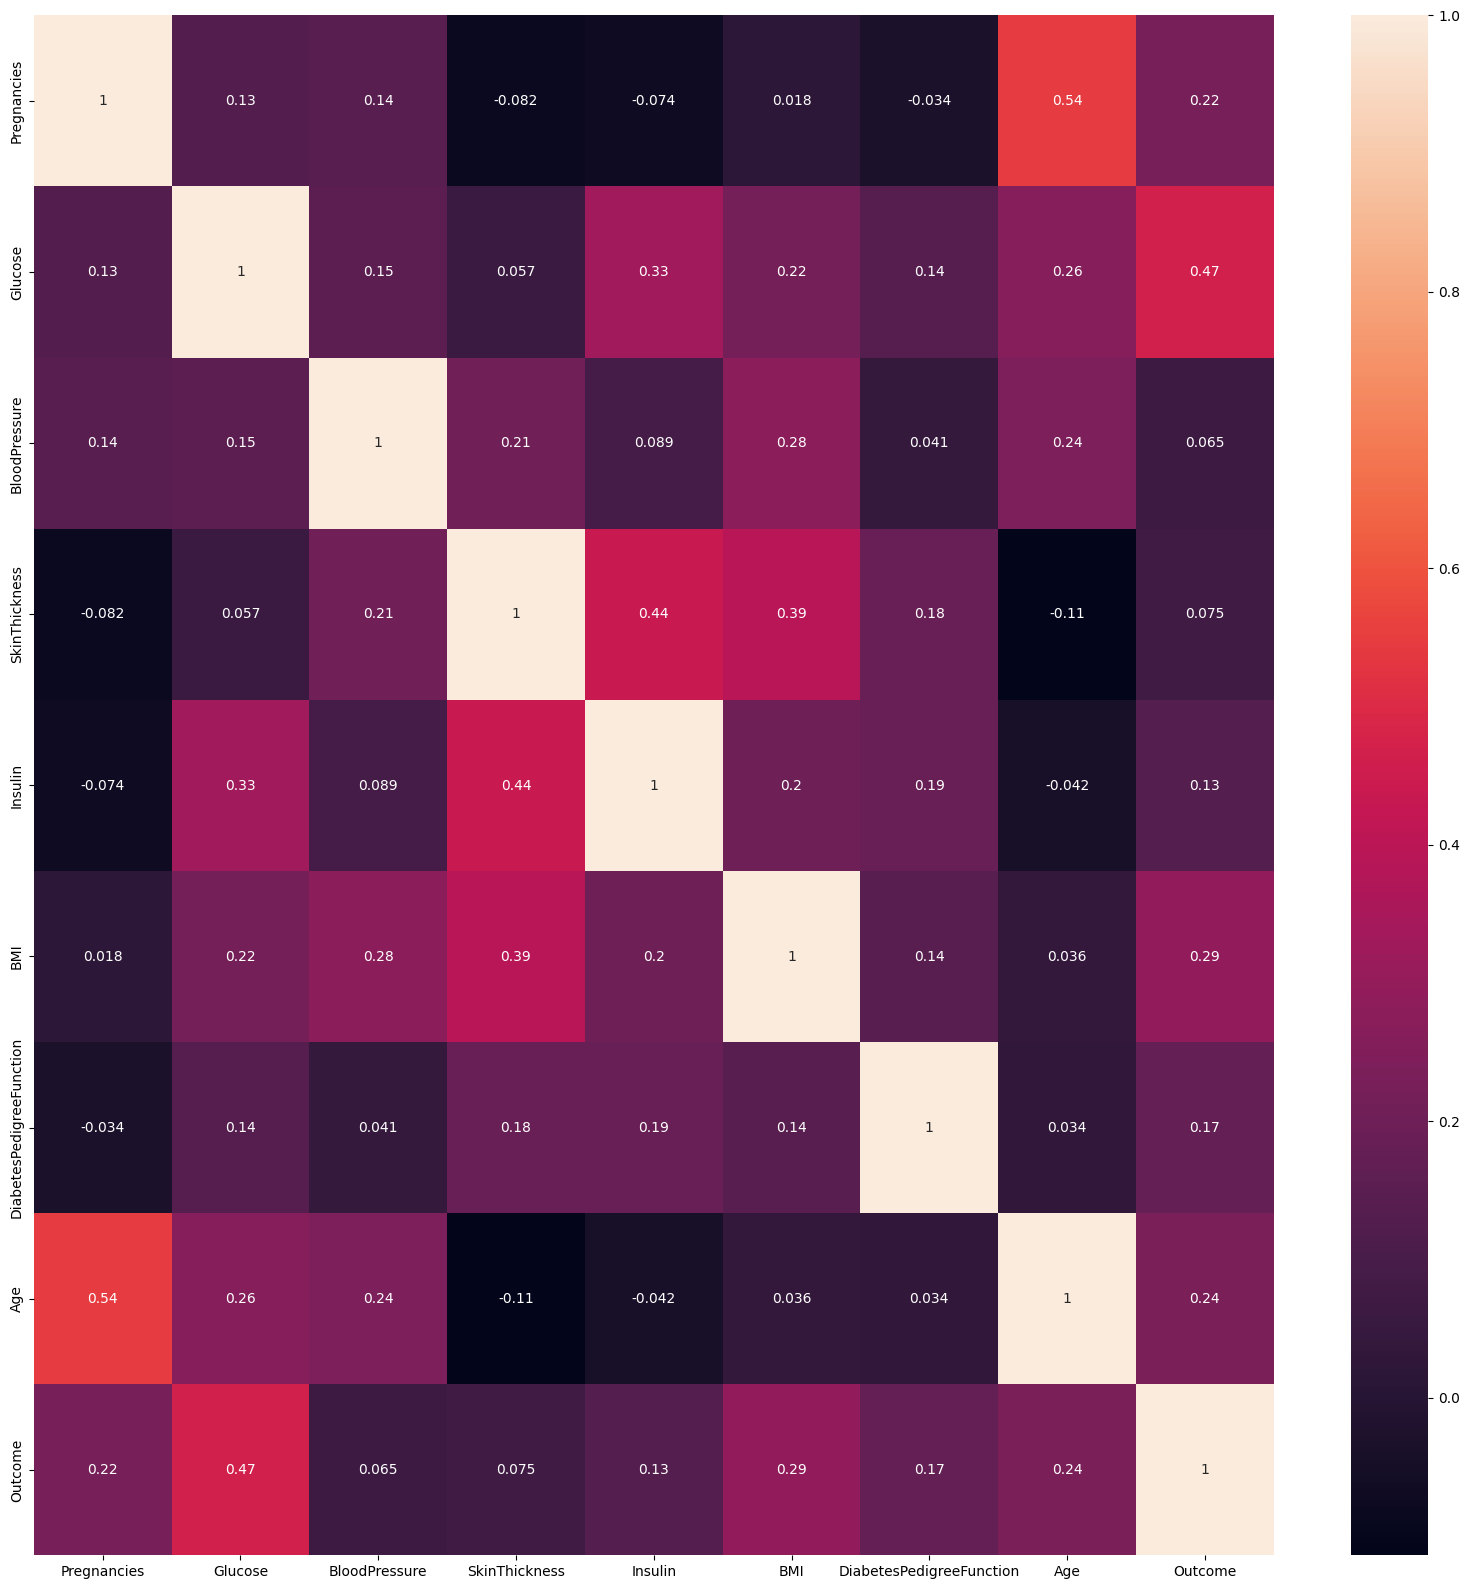

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(cdf.corr(numeric_only=True), annot=True) 

In [44]:
X=cdf.drop(columns='Outcome', axis=1)

In [17]:
y=cdf['Outcome']

In [18]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [19]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [20]:
sc=StandardScaler()

In [21]:
sc.fit(X)

StandardScaler()

In [22]:
sd = sc.transform(X)

In [23]:
sd

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [24]:
X=sd
y=cdf['Outcome']

In [25]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [27]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
diabetes_model = DecisionTreeRegressor(random_state = 1)

In [47]:
diabetes_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [48]:
X_train_prediction = diabetes_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
training_data_accuracy

C:\Users\Rojan Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


0.6482084690553745

In [49]:
X_test_prediction = diabetes_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
test_data_accuracy

C:\Users\Rojan Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


0.6363636363636364

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
random_diabetes = RandomForestClassifier(random_state=1)

In [57]:
random_diabetes.fit(X, y)

RandomForestClassifier(random_state=1)

In [59]:
X_train_prediction = random_diabetes.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
training_data_accuracy

C:\Users\Rojan Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.6514657980456026

In [60]:
X_test_prediction = random_diabetes.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
test_data_accuracy

C:\Users\Rojan Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.6493506493506493

# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
neighbor_diabetes = KNeighborsClassifier(n_neighbors=42)

In [107]:
neighbor_diabetes.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=42)

In [108]:
X_train_prediction = neighbor_diabetes.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
training_data_accuracy

0.7736156351791531

In [109]:
X_test_prediction = neighbor_diabetes.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
test_data_accuracy

0.7142857142857143

# Logisctic Regression

In [113]:
from sklearn import linear_model

In [114]:
logr = linear_model.LogisticRegression(max_iter=1000)
logr.fit(X,y)

LogisticRegression(max_iter=1000)

In [115]:
X_train_prediction = logr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
training_data_accuracy

C:\Users\Rojan Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6514657980456026

In [116]:
X_test_prediction = logr.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
test_data_accuracy

C:\Users\Rojan Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6493506493506493

# Naive Bayes

In [118]:
from sklearn.naive_bayes import GaussianNB

In [119]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X, y)

GaussianNB()

In [120]:
X_train_prediction = naive_bayes_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
training_data_accuracy

C:\Users\Rojan Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.6612377850162866

In [121]:
X_test_prediction = naive_bayes_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
test_data_accuracy

C:\Users\Rojan Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.6493506493506493

# SVM

In [28]:
#training the model
from sklearn import svm
classifier=svm.SVC(kernel='linear')

In [29]:
#training the support vector machine classifer #machine laerning model
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
#model evaluation
#acuuracy for training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)
training_data_accuracy

0.7866449511400652

In [32]:
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)
test_data_accuracy

0.7727272727272727

making the prediction system

In [126]:
from sklearn.preprocessing import StandardScaler

In [37]:
input_data1 = (7,196,90,0,0,39.8,0.451,41)
input_data2 = (4,116,75,0,1,41.3,0.3512,61)
input_data3 = (10,168,74,0,0,38,0.537,34)
input_data4 = (7,106,60,24,0,26.5,0.296,29)

In [38]:
def make_prediction(data):
    n = np.asarray(data)
    input_data_reshape = n.reshape(1, -1)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        std_data = sc.transform(input_data_reshape)
    
    prediction=classifier.predict(std_data)

    if(prediction[0]==0):
        print("the person is not diabetic")
    else:
        print("the person is diabetic")

In [39]:
make_prediction(input_data1)
make_prediction(input_data2)
make_prediction(input_data3)
make_prediction(input_data4)

the person is diabetic
the person is not diabetic
the person is diabetic
the person is not diabetic
